## Distritos de Madrid

En este estudio se va analizar como influyen diferentes variables en el precio de alquiler y la renta en todos los distritos de Madrid. Para ello se ha ha utilizado la api rest de Madrid https://datos.madrid.es/portal/site/egob/menuitem.214413fe61bdd68a53318ba0a8a409a0/?vgnextoid=b07e0f7c5ff9e510VgnVCM1000008a4a900aRCRD&vgnextchannel=b07e0f7c5ff9e510VgnVCM1000008a4a900aRCRD&vgnextfmt=default
 y datos descargados de su pagina. Tambien se ha extraido datos a traves de web scrapping de la agencia tributaria.

## Web sraping

In [1]:
import requests
url = "https://www.agenciatributaria.es/AEAT/Contenidos_Comunes/La_Agencia_Tributaria/Estadisticas/Publicaciones/sites/irpfCodPostal/2016/jrubikf15b9305df2e5d53b0bbd20afaea102233fc84fd9.html"
page = requests.get(url)

In [2]:

from urllib.request import urlopen
 
from bs4 import BeautifulSoup
 
html = urlopen(url)
 
res = BeautifulSoup(html.read(),"html5lib");
 
print(res.title)
print(res)

<title>Estadística de los declarantes del IRPF de los mayores municipios por código postal: 2016:
Renta bruta y Renta disponible inframunicipal
Tramos de Base Imponible: Total
</title>
<!--?xml version="1.0" encoding="UTF-8"?--><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="es" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Estadística de los declarantes del IRPF de los mayores municipios por código postal: 2016:
Renta bruta y Renta disponible inframunicipal
Tramos de Base Imponible: Total
</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="0" http-equiv="expires"/>
<meta content="no-cache" http-equiv="Cache-Control"/>
<meta content="15/01/19 14:57" name="date"/>
<meta content="telephone=no" name="format-detection"/>
<link href="Temas/comun/css/estudios_internet.css" rel="stylesheet" type="text/css"/>
<link href="Temas/comun/css/print/estudios_internet_p

In [3]:
##Extraemos los datos de la web
L = []
for i in range(1,54):
    tags = res.find("tr", {"id": "tr_25_"+str(i)}).select("td")
    nombre =  res.find("tr", {"id": "tr_25_"+str(i)}).select("th")[0].getText()
    num_declaraciones =tags[0].getText()
    renta_bruta_media=tags[1].getText();
    renta_disponible_meadia = tags[2].getText();
    L.append([nombre,num_declaraciones, renta_bruta_media, renta_disponible_meadia]) 


In [4]:
import pandas as pd
dfRentas = pd.DataFrame(L, columns = ["nombre","declaraciones", "renta_media", "renta_disponible"])
dfRentas.head(6)

,nombre,declaraciones,renta_media,renta_disponible
0,28001-Salamanca- Goya,14.702,81.634,61.562
1,28002-Chamartín,36.370,51.636,39.717
2,28003-Chamberí-Rios Rosas,30.513,49.808,38.353
3,28004-Justicia,21.126,40.034,31.023
4,28005-Arganzuela,46.439,36.005,28.477
5,28006-Castellana,22.113,74.907,56.011


In [5]:
#quitamos el codigo postal del nombre
dfRentas['postal-code'], dfRentas['district']  = dfRentas['nombre'].str.split('-',1).str
dfRentas = dfRentas.drop('nombre', 1)
del dfRentas['renta_disponible']
dfRentas


,declaraciones,renta_media,postal-code,district
0,14.702,81.634,28001,Salamanca- Goya
1,36.370,51.636,28002,Chamartín
2,30.513,49.808,28003,Chamberí-Rios Rosas
3,21.126,40.034,28004,Justicia
4,46.439,36.005,28005,Arganzuela
5,22.113,74.907,28006,Castellana
6,47.667,41.622,28007,Adelfas
7,20.802,48.429,28008,Moncloa
8,24.829,50.392,28009,Ibiza-Niño Jesús
9,24.166,61.891,28010,Almagro


### Datos del alquiler

In [6]:
import pandas as pd
dfAlquiler = pd.read_csv("precioAlquiler.csv",sep=';')
dfAlquiler

,Distritito,q1,q2,q3
0,01. Centro,4.915,4.987,4.832
1,02. Arganzuela,3.950,3.950,3.709
2,03. Retiro,4.834,4.876,4.764
3,04. Salamanca,5.987,5.930,5.675
4,05. Chamartín,5.143,5.007,4.905
5,06. Tetuán,3.649,3.558,3.411
6,07. Chamberí,5.243,5.202,5.000
7,08. Fuencarral-El Pardo,3.386,3.318,3.184
8,09. Moncloa-Aravaca,4.143,4.133,4.101
9,10. Latina,2.241,2.146,2.096


##### Igual que en el ejemplo anterior nos quedamos unicamente con el nombre del distrito y calculamos la media de los 3 q


In [7]:
dfAlquiler['n'], dfAlquiler['district'] = dfAlquiler['Distritito'].str.split('.', 1).str
dfAlquiler = dfAlquiler.drop('Distritito', 1)
del dfAlquiler['n']
dfAlquiler

,q1,q2,q3,district
0,4.915,4.987,4.832,Centro
1,3.950,3.950,3.709,Arganzuela
2,4.834,4.876,4.764,Retiro
3,5.987,5.930,5.675,Salamanca
4,5.143,5.007,4.905,Chamartín
5,3.649,3.558,3.411,Tetuán
6,5.243,5.202,5.000,Chamberí
7,3.386,3.318,3.184,Fuencarral-El Pardo
8,4.143,4.133,4.101,Moncloa-Aravaca
9,2.241,2.146,2.096,Latina


In [8]:
dfAlquiler['mediaAlquiler']=dfAlquiler.mean(axis=1,numeric_only=True)
del dfAlquiler['q1']
del dfAlquiler['q2']
del dfAlquiler['q3']
dfAlquiler


,district,mediaAlquiler
0,Centro,4.911333
1,Arganzuela,3.869667
2,Retiro,4.824667
3,Salamanca,5.864000
4,Chamartín,5.018333
5,Tetuán,3.539333
6,Chamberí,5.148333
7,Fuencarral-El Pardo,3.296000
8,Moncloa-Aravaca,4.125667
9,Latina,2.161000


In [9]:
## Intentamos unir los dos datframe
pd.merge(dfAlquiler,dfRentas, on='district')


,district,mediaAlquiler,declaraciones,renta_media,postal-code


In [10]:
 (dfAlquiler['district']=='Centro').any()

False

In [11]:
(dfRentas['district']=='Centro').any()

True

In [12]:
dfAlquiler["district"].unique()

array([' Centro', ' Arganzuela', ' Retiro', ' Salamanca', ' Chamartín',
       ' Tetuán', ' Chamberí', ' Fuencarral-El Pardo', ' Moncloa-Aravaca',
       ' Latina', ' Carabanchel', ' Usera', ' Puente Vallecas',
       ' Moratalaz', ' Ciudad Lineal', ' Hortaleza', ' Villaverde',
       ' Villa Vallecas', ' Vicálvaro', ' San Blas-Canillejas', ' Barajas'], dtype=object)

#### Eliminamos los espacios en blanco 

In [13]:
dfAlquiler["district"]=dfAlquiler["district"].str.strip() 
dfAlquiler["district"].unique()

array(['Centro', 'Arganzuela', 'Retiro', 'Salamanca', 'Chamartín',
       'Tetuán', 'Chamberí', 'Fuencarral-El Pardo', 'Moncloa-Aravaca',
       'Latina', 'Carabanchel', 'Usera', 'Puente Vallecas', 'Moratalaz',
       'Ciudad Lineal', 'Hortaleza', 'Villaverde', 'Villa Vallecas',
       'Vicálvaro', 'San Blas-Canillejas', 'Barajas'], dtype=object)

In [14]:
dfJoin=pd.merge(dfAlquiler,dfRentas, on='district',how='outer')
dfJoin

,district,mediaAlquiler,declaraciones,renta_media,postal-code
0,Centro,4.911333,7.040,41.567,28013
1,Arganzuela,3.869667,46.439,36.005,28005
2,Retiro,4.824667,9.497,61.367,28014
3,Salamanca,5.864000,NaN,NaN,NaN
4,Chamartín,5.018333,36.370,51.636,28002
5,Tetuán,3.539333,NaN,NaN,NaN
6,Chamberí,5.148333,NaN,NaN,NaN
7,Fuencarral-El Pardo,3.296000,NaN,NaN,NaN
8,Moncloa-Aravaca,4.125667,NaN,NaN,NaN
9,Latina,2.161000,32.161,26.874,28011


In [15]:
#hay que separar los distritos  que esten unidos por '-'
dfRentas['district'],*rest= dfRentas['district'].str.split('-').str
dfRentas


,declaraciones,renta_media,postal-code,district
0,14.702,81.634,28001,Salamanca
1,36.370,51.636,28002,Chamartín
2,30.513,49.808,28003,Chamberí
3,21.126,40.034,28004,Justicia
4,46.439,36.005,28005,Arganzuela
5,22.113,74.907,28006,Castellana
6,47.667,41.622,28007,Adelfas
7,20.802,48.429,28008,Moncloa
8,24.829,50.392,28009,Ibiza
9,24.166,61.891,28010,Almagro


In [16]:
#Volvemos a probar a hacer el join
dfJoin2=pd.merge(dfAlquiler,dfRentas, on='district',how='left')
dfJoin2

,district,mediaAlquiler,declaraciones,renta_media,postal-code
0,Centro,4.911333,7.040,41.567,28013
1,Arganzuela,3.869667,46.439,36.005,28005
2,Retiro,4.824667,9.497,61.367,28014
3,Salamanca,5.864000,14.702,81.634,28001
4,Chamartín,5.018333,36.370,51.636,28002
5,Tetuán,3.539333,44.783,31.363,28029
6,Chamberí,5.148333,30.513,49.808,28003
7,Fuencarral-El Pardo,3.296000,NaN,NaN,NaN
8,Moncloa-Aravaca,4.125667,NaN,NaN,NaN
9,Latina,2.161000,32.161,26.874,28011


In [18]:
#tenemos 6 valores en district que no se llaman igual, procedemos a cambiarlos el nombre
#No podemos hacer slipt porque en la api devuelve los nombres juntos
dfRentas=dfRentas.replace(['Fuencarral','Moncloa', 'Entrevías','Ventas','Vicalvaro','Fuencarral','San Blas'], ['Fuencarral-El Pardo', 'Moncloa-Aravaca', 'Puente Vallecas', 'Ciudad Lineal','Vicálvaro','Fuencarral-El Pardo','San Blas-Canillejas'])

#Volvemos a probar a hacer el join
dfJoin2=pd.merge(dfAlquiler,dfRentas, on='district',how='left')
dfJoin2



,district,mediaAlquiler,declaraciones,renta_media,postal-code
0,Centro,4.911333,7.040,41.567,28013
1,Arganzuela,3.869667,46.439,36.005,28005
2,Retiro,4.824667,9.497,61.367,28014
3,Salamanca,5.864000,14.702,81.634,28001
4,Chamartín,5.018333,36.370,51.636,28002
5,Tetuán,3.539333,44.783,31.363,28029
6,Chamberí,5.148333,30.513,49.808,28003
7,Fuencarral-El Pardo,3.296000,41.045,47.054,28035
8,Moncloa-Aravaca,4.125667,20.802,48.429,28008
9,Latina,2.161000,32.161,26.874,28011


#### Convertimos los datos a su tipo, cambiamos los nombres del df y quitamos las tildes para que tengan el mismo nombre

In [19]:
dfJoin2['postal-code']=dfJoin2['postal-code'].astype(int) 
dfJoin2['renta_media']=dfJoin2['renta_media'].astype(float) 

In [20]:
dfJoin2['district']=dfJoin2['district'].str.replace(" ", "") 
dfJoin2['district']=dfJoin2['district'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') 
dfJoin2= dfJoin2.drop(dfJoin2[dfJoin2['postal-code'] ==28037].index)
dfAlquilerRentas= dfJoin2.drop(dfJoin2[dfJoin2['postal-code'] ==28033].index)
dfAlquilerRentas=dfAlquilerRentas.replace(['PuenteVallecas','VillaVallecas'], ['PuenteDeVallecas', 'VillaDeVallecas'])
dfAlquilerRentas



,district,mediaAlquiler,declaraciones,renta_media,postal-code
0,Centro,4.911333,7.040,41.567,28013
1,Arganzuela,3.869667,46.439,36.005,28005
2,Retiro,4.824667,9.497,61.367,28014
3,Salamanca,5.864000,14.702,81.634,28001
4,Chamartin,5.018333,36.370,51.636,28002
5,Tetuan,3.539333,44.783,31.363,28029
6,Chamberi,5.148333,30.513,49.808,28003
7,Fuencarral-ElPardo,3.296000,41.045,47.054,28035
8,Moncloa-Aravaca,4.125667,20.802,48.429,28008
9,Latina,2.161000,32.161,26.874,28011


## Api rest de Madrid

Para todas las llamadas, la respuesta es la misma, por tanto hacemos una funcion generica para obtener los datos

In [21]:
import urllib.request
import urllib.parse
import json
import pandas as pd
def cargarJson(url):    
    f = urllib.request.urlopen(url)
    r=json.loads(f.read().decode('utf-8'))       
    return r

def crearDf(dataframe,json):
    for row in json['@graph']:         
        add_row2(dataframe, row)
    return dataframe


def add_row2(df, centros):
    title = centros['title']
    
    if('address' in centros):
        if( 'district' in centros['address']):       
            district = centros['address']['district']['@id'].split('/')[-1]
        else:
            district = None
        if( 'area' in centros['address']):      
           
            area = centros['address']['area']['@id'].split('/')[-1]
        else:
            area=None            
        if ('postal-code' in centros['address']):
            postal =centros['address']["postal-code"]
        else:
            postal = None
        if ('locality' in centros['address']):
            locality = centros['address']["locality"]
        else:
            locality = None
    else:
        area=None
        district = None
        postal = None
        locality = None
    
    df.loc[centros["id"]] = [title, district,area,postal, locality]


    

## Actividades culturales

In [22]:
url = "https://datos.madrid.es/egob/catalogo/206974-0-agenda-eventos-culturales-100.json"
jsonInfo = cargarJson(url)
actividadesCulturalesFrame = pd.DataFrame(columns=["actividadesCulturales", "district", "area", "postal-code","locality"])
actividadesCulturalesFrame = crearDf(actividadesCulturalesFrame,jsonInfo)
actividadesCulturalesFrame.head(10)



,actividadesCulturales,district,area,postal-code,locality
10897130,13 años a pie de calle. Escuela de Vallecas viva.,VillaDeVallecas,None,None,None
10898295,13 y martes,Salamanca,None,None,None
10893614,150 aniversario del Retiro como Parque Público.,Retiro,None,None,None
10896574,2 de Mayo de 1808,CiudadLineal,None,None,None
10898409,2001: Odisea del espacio,Retiro,None,None,None
10847853,A lo bestia con Volvoreta,Latina,None,None,None
10848496,A lo bestia con Volvoreta,Carabanchel,None,None,None
10847892,A lo bestia con Volvoreta,Salamanca,None,None,None
10847839,A lo bestia con Volvoreta,Usera,None,None,None
10847846,A lo bestia con Volvoreta,Arganzuela,None,None,None


## Actividades deportivas

In [23]:
url = "https://datos.madrid.es/egob/catalogo/212504-0-agenda-actividades-deportes.json"
jsonInfo = cargarJson(url)
actividadesDeportivasFrame = pd.DataFrame(columns=["actividadesDeportivas", "district", "area", "postal-code","locality"])
actividadesDeportivasFrame = crearDf(actividadesDeportivasFrame,jsonInfo)
actividadesDeportivasFrame.head(10)

,actividadesDeportivas,district,area,postal-code,locality
10756004,Bailes Latinos,Carabanchel,None,None,None
10714257,Campeonato regional de Madrid Juego de mesa 'H...,Carabanchel,None,None,None
10656610,Cine - No soy un hombre fácil,Carabanchel,None,None,None
7362383,Comunícate bailando,VillaDeVallecas,None,None,None
10601738,Copa de Primavera 2018,None,None,None,None
10656634,Costura de supervivencia y customización,Carabanchel,None,None,None
10766746,Curso Piragüismo Inclusivo. Fundación También,Barajas,None,None,None
10844045,Curso Piragüismo orientado hacia la promoción ...,Barajas,None,None,None
10600903,English Club,Carabanchel,None,None,None
10755976,Entre Hombres,Carabanchel,None,None,None


## Centros de educacion

In [24]:
url = "https://datos.madrid.es/egob/catalogo/212790-0-centros-educacion.json"
jsonInfo = cargarJson(url)
centrosEducacionFrame = pd.DataFrame(columns=["centrosEducacion", "district", "area", "postal-code","locality"])
centrosEducacionFrame = crearDf(centrosEducacionFrame,jsonInfo)
centrosEducacionFrame.head(10)

,centrosEducacion,district,area,postal-code,locality
167390,Academia Darío Estudio,Centro,Palacio,28013,MADRID
135362,Academia J.E.A.,Centro,Justicia,28004,MADRID
5373,"Altair, Colegio Internacional",Chamartin,NuevaEspana,28036,MADRID
10127337,Aula Municipal de Formación de Personas Adulta...,Centro,Embajadores,28005,MADRID
5422896,Aula Municipal de Formación de Personas Adulta...,Chamberi,Almagro,28010,MADRID
6599,Aula Municipal de Formación de Personas Adulta...,CiudadLineal,Ventas,28017,MADRID
6605,Aula Municipal de Formación de Personas Adulta...,SanBlas-Canillejas,Arcos,28037,MADRID
6602,Aula Municipal de Formación de Personas Adulta...,Villaverde,SanAndres,28021,MADRID
6603,Aula Municipal de Formación de Personas Adulta...,Villaverde,SanCristobal,28021,MADRID
5236566,Casa de Niños Daniel Vázquez Díaz,Moncloa-Aravaca,Valdezarza,28039,MADRID


# Teatros

In [25]:
url = "https://datos.madrid.es/egob/catalogo/208862-7650046-ocio_salas.json"
jsonInfo = cargarJson(url)
teatrosFrame = pd.DataFrame(columns=["teatros", "district", "area", "postal-code","locality"])
teatrosFrame = crearDf(teatrosFrame,jsonInfo)
teatrosFrame.head(10)

,teatros,district,area,postal-code,locality
10511835,Café Teatro Serendipia,CiudadLineal,Quintana,28027,MADRID
8628780,Centro Cultural Daoíz y Velarde,Retiro,Pacifico,28007,MADRID
7869361,DT Espacio Escénico,Centro,Justicia,28004,MADRID
10511843,El burdel a escena,Centro,Embajadores,28012,MADRID
10511844,El foro de Izab,Centro,Embajadores,28005,MADRID
81184,El Pavón Teatro Kamikaze,Centro,Embajadores,28012,MADRID
10037757,El umbral de la primavera,Centro,Embajadores,28012,MADRID
10511854,Estudio 2 Manuel Galiana,Arganzuela,Acacias,28005,MADRID
8158007,Extensión AVAM. Matadero Madrid,Arganzuela,Chopera,28045,MADRID
8158008,Factoría cultural. Matadero Madrid,Arganzuela,Chopera,28045,MADRID


# Cines

In [26]:
url = "https://datos.madrid.es/egob/catalogo/208862-7650164-ocio_salas.json"
jsonInfo = cargarJson(url)
cinesFrame = pd.DataFrame(columns=["cines", "district", "area", "postal-code","locality"])
cinesFrame = crearDf(cinesFrame,jsonInfo)
cinesFrame.head(100)


,cines,district,area,postal-code,locality
10276080,Autocine Madrid RACE,Fuencarral-ElPardo,Valverde,28034,MADRID
7381184,Centro Comercial Dreams - Palacio Municipal de...,Hortaleza,Canillas,28043,MADRID
17302,Cine Acteón,Centro,Sol,28013,MADRID
55827,Cine Artesiete Alcalá Full HD,CiudadLineal,PuebloNuevo,28027,MADRID
6647175,Cine Artistic Metropol,Arganzuela,Acacias,28005,MADRID
17319,Cine Callao,Centro,Sol,28013,MADRID
17321,Cine Capitol,Centro,Palacio,28013,MADRID
17304,Cine Cinesa La Gavia,VillaDeVallecas,CascoHVallecas,28051,MADRID
68001,Cine Cinesa Las Rosas 3D,SanBlas-Canillejas,Arcos,28032,MADRID
33938,Cine Cinesa Méndez Álvaro 3D,Arganzuela,Atocha,28045,MADRID


# Museos

In [27]:
url = "https://datos.madrid.es/egob/catalogo/201132-0-museos.json"
jsonInfo = cargarJson(url)
museosFrame = pd.DataFrame(columns=["museos", "district", "area", "postal-code","locality"])
museosFrame = crearDf(museosFrame,jsonInfo)
museosFrame.head(6)

,museos,district,area,postal-code,locality
4847190,Casa Museo Lope de Vega,Centro,Cortes,28014,MADRID
4949641,Casita - Museo del Ratón Pérez,Centro,Sol,28013,MADRID
5682031,Castillo de la Alameda,Barajas,AlamedaOsuna,28042,MADRID
2064,Casón del Buen Retiro,Retiro,LosJeronimos,28014,MADRID
103331,Centro Social y Cultural La Casa Encendida,Centro,Embajadores,28012,MADRID
6469186,Ermita de San Antonio de la Florida (Museo),Moncloa-Aravaca,CasaCampo,28008,MADRID


## Oficinas de policia

In [28]:
url = "https://datos.madrid.es/egob/catalogo/207044-0-oficina-policia.json"
jsonInfo = cargarJson(url)
policiasFrame = pd.DataFrame(columns=["policias", "district", "area", "postal-code","locality"])
policiasFrame = crearDf(policiasFrame,jsonInfo)
policiasFrame.head(100)

,policias,district,area,postal-code,locality
7497459,Oficina de Atención al Ciudadano (OAC). Policí...,Arganzuela,Chopera,28045,MADRID
6913389,Oficina de Atención al Ciudadano (OAC). Policí...,Barajas,Aeropuerto,28042,MADRID
6322837,Oficina de Atención al Ciudadano (OAC). Policí...,Carabanchel,PuertaBonita,28025,MADRID
6322846,Oficina de Atención al Ciudadano (OAC). Policí...,Centro,Universidad,28004,MADRID
6322861,Oficina de Atención al Ciudadano (OAC). Policí...,Centro,Sol,28013,MADRID
6322843,Oficina de Atención al Ciudadano (OAC). Policí...,Chamartin,CiudadJardin,28002,MADRID
6322855,Oficina de Atención al Ciudadano (OAC). Policí...,Chamberi,RiosRosas,28003,MADRID
6322838,Oficina de Atención al Ciudadano (OAC). Policí...,CiudadLineal,PuebloNuevo,28017,MADRID
6322839,Oficina de Atención al Ciudadano (OAC). Policí...,Fuencarral-ElPardo,Valverde,28034,MADRID
6322850,Oficina de Atención al Ciudadano (OAC). Policí...,Hortaleza,Canillas,28043,MADRID


### Mergeamos todos los data frame en uno solo, contado el numero de cada atributo

In [29]:
numeroCines=cinesFrame.groupby("district").count()["cines"].to_frame()
numeroMuseos=museosFrame.groupby("district").count()["museos"].to_frame()
numeroTeatros=teatrosFrame.groupby("district").count()["teatros"].to_frame()
numeroCentrosEducacion=centrosEducacionFrame.groupby("district").count()["centrosEducacion"].to_frame()
numeroActividadesDeportivas = actividadesDeportivasFrame.groupby("district").count()["actividadesDeportivas"].to_frame()
numeroActividadesCulturales=actividadesCulturalesFrame.groupby("district").count()["actividadesCulturales"].to_frame()
numeroComisarias=policiasFrame.groupby("district").count()["policias"].to_frame()


fusion=pd.merge(dfAlquilerRentas,numeroCines,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroMuseos,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroTeatros,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroCentrosEducacion,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroActividadesDeportivas,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroActividadesCulturales,how="outer",left_on="district",right_index=True)
fusion=pd.merge(fusion,numeroComisarias,how="outer",left_on="district",right_index=True)

fusion.fillna(0)


,district,mediaAlquiler,declaraciones,renta_media,postal-code,cines,museos,teatros,centrosEducacion,actividadesDeportivas,actividadesCulturales,policias
0,Centro,4.911333,7.040,41.567,28013,6.0,26.0,62.0,54,0.0,120,2
1,Arganzuela,3.869667,46.439,36.005,28005,3.0,2.0,15.0,59,0.0,27,1
2,Retiro,4.824667,9.497,61.367,28014,1.0,7.0,2.0,44,0.0,65,1
3,Salamanca,5.864000,14.702,81.634,28001,2.0,6.0,4.0,40,0.0,48,1
4,Chamartin,5.018333,36.370,51.636,28002,1.0,1.0,1.0,99,0.0,39,1
5,Tetuan,3.539333,44.783,31.363,28029,0.0,1.0,0.0,43,0.0,40,1
6,Chamberi,5.148333,30.513,49.808,28003,7.0,6.0,7.0,59,0.0,2,1
7,Fuencarral-ElPardo,3.296000,41.045,47.054,28035,2.0,4.0,0.0,126,1.0,67,1
8,Moncloa-Aravaca,4.125667,20.802,48.429,28008,3.0,9.0,4.0,86,0.0,9,1
9,Latina,2.161000,32.161,26.874,28011,0.0,2.0,1.0,92,0.0,96,1


##### ¿La renta media influye en el alquiler por metro cuadrado?


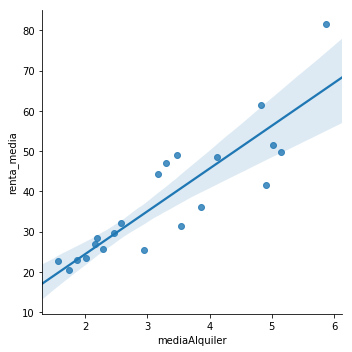

In [30]:
%matplotlib inline
import seaborn as sns
sns.lmplot(x="mediaAlquiler", y="renta_media", data=fusion);

Como se ve en la grafica, la media del alquiler por metro cuadrado y la renta media de la persona por distrito, practicamente sigue una recta, podemos ver que cuanto mas aumenta el alquiler, la renta es mayor,casi es proporcional. Por tanto, las personas con rentas mas altas viven en distritos en los cuales los alquileres son mas caros.

A continuacion vamos a mostrar los tres distritos con media de alquiler mas alta y con la renta media mas alta:

In [31]:
fusion.sort_values('mediaAlquiler', ascending=False).head(3)['district']

3    Salamanca
6     Chamberi
4    Chamartin
Name: district, dtype: object

In [32]:
fusion.sort_values('renta_media', ascending=False).head(3)['district']

3    Salamanca
2       Retiro
4    Chamartin
Name: district, dtype: object

##### ¿El numero de cines en un distrito es proporcional al numero de teatros y museos?

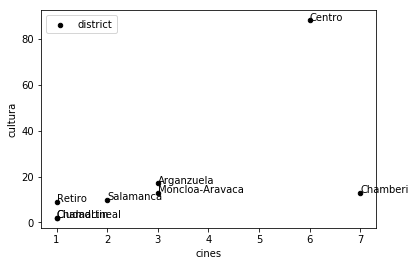

In [33]:
##sumamos los cines y los teatros
import matplotlib.pyplot as plt

fusion['cultura']=fusion['museos']+fusion['teatros']

fusion.plot.scatter(x='cines', y='cultura', c='black',label='district')

for i,fila in fusion.iterrows():
    plt.annotate(fusion.loc[i]['district'], (fusion.loc[i]['cines'],fusion.loc[i]['cultura']))
    
            
plt.show() 



No influye que si en un distrito hay mas cines, vaya haber mas teatros, pero si que influye que la mayoria de distritos que no tienen cines tampoco tienen teatros ni museos. A un distrito muy diferenciado del resto, como era de esperar el Centro, la suma de teatros y museos es muy superior a cualquier otro. Por eso la mayoria de turistas lo visitan.

##### ¿Las actividades culturales y deportivas influyen en el precio por metro cuadrado?

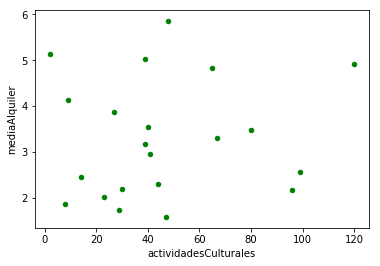

In [34]:
fusion.plot.scatter(x='actividadesCulturales', y='mediaAlquiler', c='green')


Como se apreciar en algunos si que influye pero en la mayoria no, el segundo distrito con mas actividades tiene un alquiler por metro cuadrado de los mas bajos,en cambio hay varios de 20 actividades culturales que tienen el alquiler mas alto.

##### ¿Si en un distrito hay mas centros educacion, la renta media es mas alta?

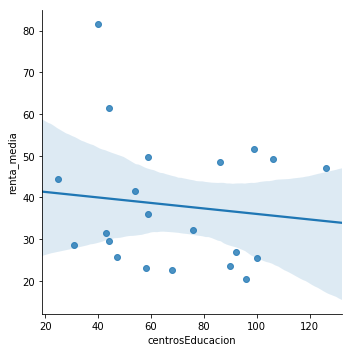

In [35]:
import seaborn as sns
sns.lmplot(x="centrosEducacion", y="renta_media", data=fusion);

Como se puede ver, si un distrito hay mas centros de educacion, no influye que la renta media de sus habitantes sea mas alta, que haya mas centros de educacion problamente influira el tamaño del distrito y la cantidad de habitantes que vivan.

In [55]:
import plotly as py

fusionNumeric = fusion._get_numeric_data()
fusionNumeric.pct_change().corr(method='pearson')
df=fusionNumeric.pct_change()
absolute_bounds=True 
heatmap = py.graph_objs.Heatmap(
        z=df.corr(method='pearson').as_matrix(),
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
     
layout = py.graph_objs.Layout(title="Heatmap variables Madrid")  
  
         
fig = py.graph_objs.Figure(data=[heatmap], layout=layout)
   
py.plotly.iplot(fig, filename='Heatmap variables Madrid')




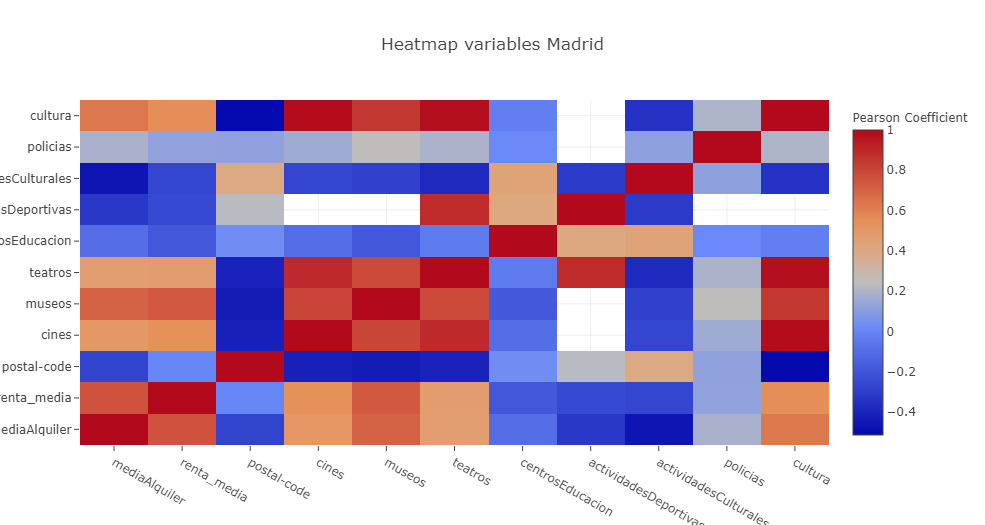

In [45]:
##Adjunto imagen, ya que es una imagen dinamica y quizas no se carga automaticamente
from IPython.display import Image
Image(filename='heatmap.png')

Con el Heatmap podemos ver la correlacion entre todas las variables, si es mas rojo es que estan mas relacionadas entre si, al contrario que lo azul. Como hemos visto antes la renta media y el alquiler estan muy relacionadas. Los teatros, museos y cines tambien estan muy relacionadas. Como se puede ver los museos influyen mas que los teatros y los cines en el en el alquiler y la media.Otras variables como las actividades o los centros de educacion apenas influyen

## Paro

In [37]:
import pandas as pd
##Importante poner decimal para que no coja los float como object
dfParo = pd.read_csv("paro.csv",sep=';',decimal=",")
dfParo

,distrito,Total,16 - 24 añosAmbos,25 - 44 años ambos,45 -64 años ambos,TotalH,16 - 24 añosH,25 - 44 añosH,45 -64 añosH,TotalM,16 - 24 añosM,25 - 44 añosM,45 -64 añosM
0,Centro,7.15,3.23,5.80,9.99,6.92,3.40,5.28,10.10,7.40,3.06,6.40,9.88
1,Arganzuela,6.20,3.06,5.46,7.76,5.57,2.87,4.73,7.24,6.78,3.25,6.17,8.22
2,Retiro,5.44,1.90,4.83,6.96,5.01,1.90,4.27,6.64,5.83,1.90,5.35,7.22
3,Salamanca,4.85,1.58,4.07,6.72,4.41,1.78,3.62,6.20,5.23,1.39,4.46,7.12
4,Chamartin,4.83,1.36,4.03,6.65,4.55,1.72,3.64,6.43,5.07,1.02,4.37,6.83
5,Tetuan,7.03,3.74,5.66,9.76,6.75,4.02,4.99,10.01,7.28,3.48,6.27,9.56
6,Chamberí,5.16,1.87,4.58,6.81,4.82,1.68,4.24,6.55,5.44,2.04,4.88,7.01
7,Fuencarral-ElPardo,5.65,2.51,4.98,7.33,4.96,2.47,4.15,6.67,6.28,2.54,5.75,7.91
8,Moncloa-Aravaca,5.30,1.95,5.01,6.71,4.97,1.83,4.31,6.73,5.59,2.07,5.65,6.70
9,Latina,8.52,4.74,8.02,10.14,8.02,5.07,7.11,9.88,8.97,4.42,8.87,10.37


In [38]:
dfParo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
distrito              21 non-null object
Total                 21 non-null float64
16 - 24 añosAmbos     21 non-null float64
25 - 44 años ambos    21 non-null float64
45 -64 años ambos     21 non-null float64
TotalH                21 non-null float64
16 - 24 añosH         21 non-null float64
25 - 44 añosH         21 non-null float64
45 -64 añosH          21 non-null float64
TotalM                21 non-null float64
16 - 24 añosM         21 non-null float64
25 - 44 añosM         21 non-null float64
45 -64 añosM          21 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.2+ KB


##### ¿El paro es igual para hombres que para mujeres?

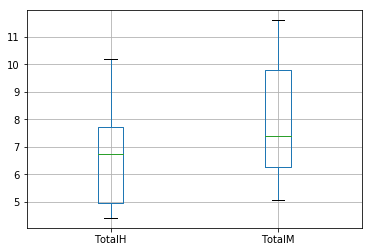

In [39]:
boxplot = dfParo.boxplot(column=['TotalH', 'TotalM'])

In [41]:
from scipy.stats import ttest_ind
import numpy as np
np.var(dfParo['TotalH']), np.var(dfParo['TotalM']) 

(2.962887074829932, 4.1877619047619055)

In [42]:
ts, p = ttest_ind(dfParo['TotalH'], dfParo['TotalM'], equal_var=False)
print(p)
'Hay Diferencia!' if p < 0.05 else 'No hay diferencia'

0.0459559801361


'Hay Diferencia!'

He planteado una hipotesis para ver si el paro es igual para hombres y para mujeres, como podemos ver en el boxplot, el para es superior para las mujeres. Tras hacer el test, se confirma lo que se ve con el grafico, hay diferencia.

##### ¿El paro depende de la edad?

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go
trace0 = go.Box(
    y=dfParo['16 - 24 añosAmbos'],
    name = '16-24',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=dfParo['25 - 44 años ambos'],
    name = '25-44',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace3 = go.Box(
    y=dfParo['45 -64 años ambos'],
    name = '45-64',
    marker = dict(
        color = 'rgb(129, 50, 128)',
    )
)
data = [trace0, trace1,trace3]
py.iplot(data)

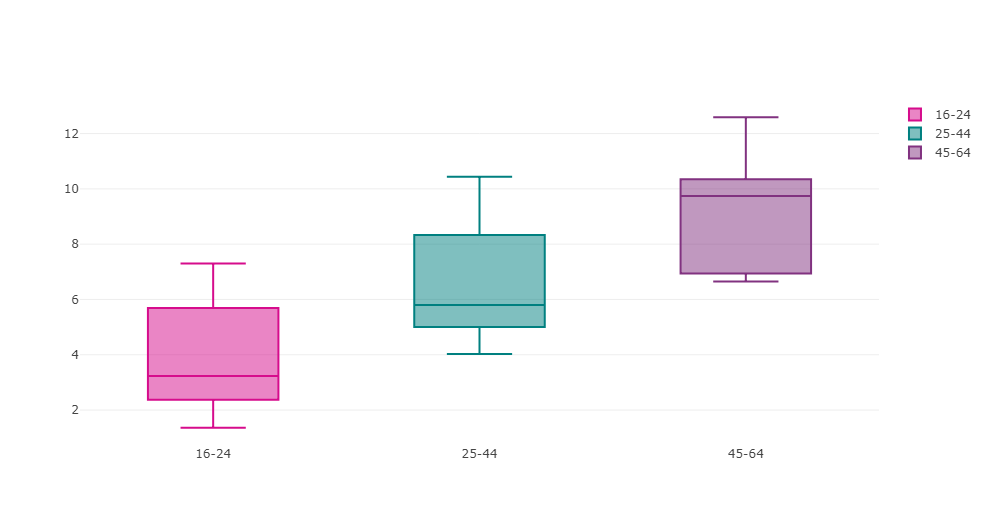

In [46]:
##Adjunto imagen, ya que es una imagen dinamica y quizas no se carga automaticamente
Image(filename='newplot2.png')

Como podemos ver el paro si varia con la edad, cuando te haces mas mayor es mas dificil conseguir trabajo. Si eres mas joven mas posibilidades tienes.

##### Uniendolo con el otro dataframe¿El paro esta correlacionado con la renta media o el precio de alquiler?

In [47]:
fusionParo=pd.merge(fusion,dfParo,how="left",left_on="district",right_on="distrito")
fusionParo


,district,mediaAlquiler,declaraciones,renta_media,postal-code,cines,museos,teatros,centrosEducacion,actividadesDeportivas,...,25 - 44 años ambos,45 -64 años ambos,TotalH,16 - 24 añosH,25 - 44 añosH,45 -64 añosH,TotalM,16 - 24 añosM,25 - 44 añosM,45 -64 añosM
0,Centro,4.911333,7.040,41.567,28013,6.0,26.0,62.0,54,NaN,...,5.80,9.99,6.92,3.40,5.28,10.10,7.40,3.06,6.40,9.88
1,Arganzuela,3.869667,46.439,36.005,28005,3.0,2.0,15.0,59,NaN,...,5.46,7.76,5.57,2.87,4.73,7.24,6.78,3.25,6.17,8.22
2,Retiro,4.824667,9.497,61.367,28014,1.0,7.0,2.0,44,NaN,...,4.83,6.96,5.01,1.90,4.27,6.64,5.83,1.90,5.35,7.22
3,Salamanca,5.864000,14.702,81.634,28001,2.0,6.0,4.0,40,NaN,...,4.07,6.72,4.41,1.78,3.62,6.20,5.23,1.39,4.46,7.12
4,Chamartin,5.018333,36.370,51.636,28002,1.0,1.0,1.0,99,NaN,...,4.03,6.65,4.55,1.72,3.64,6.43,5.07,1.02,4.37,6.83
5,Tetuan,3.539333,44.783,31.363,28029,NaN,1.0,NaN,43,NaN,...,5.66,9.76,6.75,4.02,4.99,10.01,7.28,3.48,6.27,9.56
6,Chamberi,5.148333,30.513,49.808,28003,7.0,6.0,7.0,59,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fuencarral-ElPardo,3.296000,41.045,47.054,28035,2.0,4.0,NaN,126,1.0,...,4.98,7.33,4.96,2.47,4.15,6.67,6.28,2.54,5.75,7.91
8,Moncloa-Aravaca,4.125667,20.802,48.429,28008,3.0,9.0,4.0,86,NaN,...,5.01,6.71,4.97,1.83,4.31,6.73,5.59,2.07,5.65,6.70
9,Latina,2.161000,32.161,26.874,28011,NaN,2.0,1.0,92,NaN,...,8.02,10.14,8.02,5.07,7.11,9.88,8.97,4.42,8.87,10.37


In [59]:

trace1 = go.Scatter(
    y = fusionParo['mediaAlquiler'],
    x = fusionParo['renta_media'],
    text = fusionParo['district'],
    mode='markers',
    marker=dict(
        size=16,
        color = fusionParo['Total'], 
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='scatter-plot-with-colorscale')

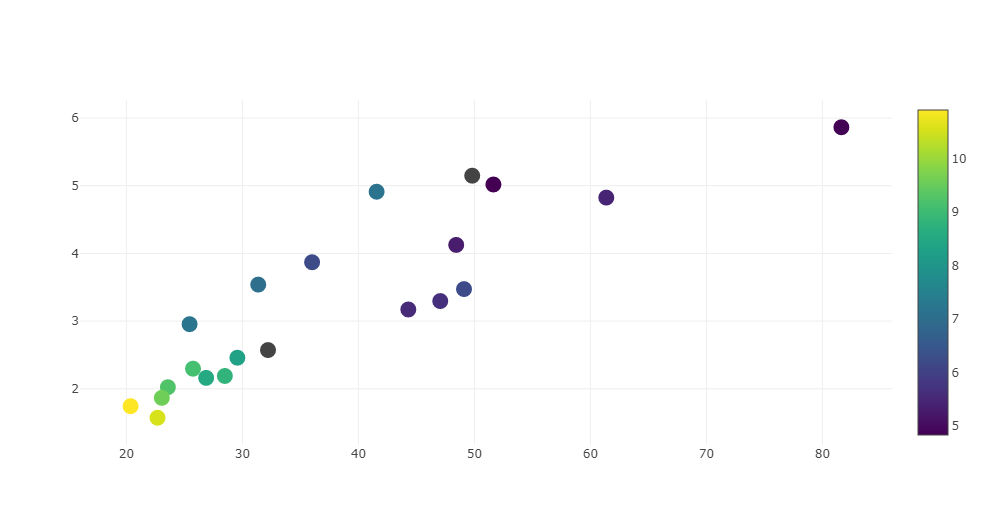

In [54]:
##Adjunto imagen, ya que es una imagen dinamica y quizas no se carga automaticamente
Image(filename='newplot.png')

En el eje x, vemos la renta media de las personas, en el eje y el precio por metro cuadrado en el alquiler. Como se puede ver en el grafico si que influye, los distritos con el alquiler y la renta tienen una tasa de paro bastante mas alta que los otros distritos. Como podemos ver a continuacion los tres distritos coinciden : Villaverde,Puente de Vallecas y Usera.

In [50]:
#Distrito con el alquiler mas bajo
fusionParo.sort_values('mediaAlquiler', ascending=True).head(3)['district']

16          Villaverde
12    PuenteDeVallecas
11               Usera
Name: district, dtype: object

In [51]:
#Distritos con mas paro
fusionParo.sort_values('Total', ascending=False).head(3)['district']

12    PuenteDeVallecas
16          Villaverde
11               Usera
Name: district, dtype: object

In [52]:
#Distrito con la renta mas baja
fusionParo.sort_values('renta_media', ascending=True).head(3)['district']

12    PuenteDeVallecas
16          Villaverde
11               Usera
Name: district, dtype: object